In [1]:

import numpy as np

import sys
sys.path.append("../code/")
from dataloader import APPLIANCE_ORDER, get_train_test
from sklearn.metrics import mean_absolute_error
import os
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../code/')
%matplotlib inline
import itertools
from pathlib import Path

In [2]:
predictions = np.load("../pred.npy").item()

In [3]:
dataset = 1

In [4]:
tensor = {}
tensor[1] = np.load("../2015-5appliances.numpy.npy")
tensor[3] = np.load("../2015-5appliances-subtract-true-agg.npy")

In [5]:
import math
# math.ceil(pd.DataFrame(max_pred).max()[appliance]/10.0)*10

In [6]:
max_pred = {}
for home in [3]:
    for day in [110]:
        for idx, appliance in enumerate(APPLIANCE_ORDER[1:-1]):
            max_pred[appliance] = {}
            for method in ['fhmm', 'stf', 'mtf', 'sc', 'dsc', 'ind cnn', 'tree cnn']:
                pred = np.minimum(predictions[dataset][method][appliance][home][day], tensor[dataset][home, 0:1, day])
#                 print(tensor[dataset][home, idx+1, day].max())
                max_pred[appliance][method] =pred.max()

In [7]:
APPLIANCE = ['HVAC', 'Fridge', 'Dryer', 'Dishwasher', 'Microwave']

[<matplotlib.lines.Line2D object at 0x7ffa5f23c0b8>, <matplotlib.lines.Line2D object at 0x7ffa5fbae710>]


Text(0.5,0.1,'Time(24 hours)')

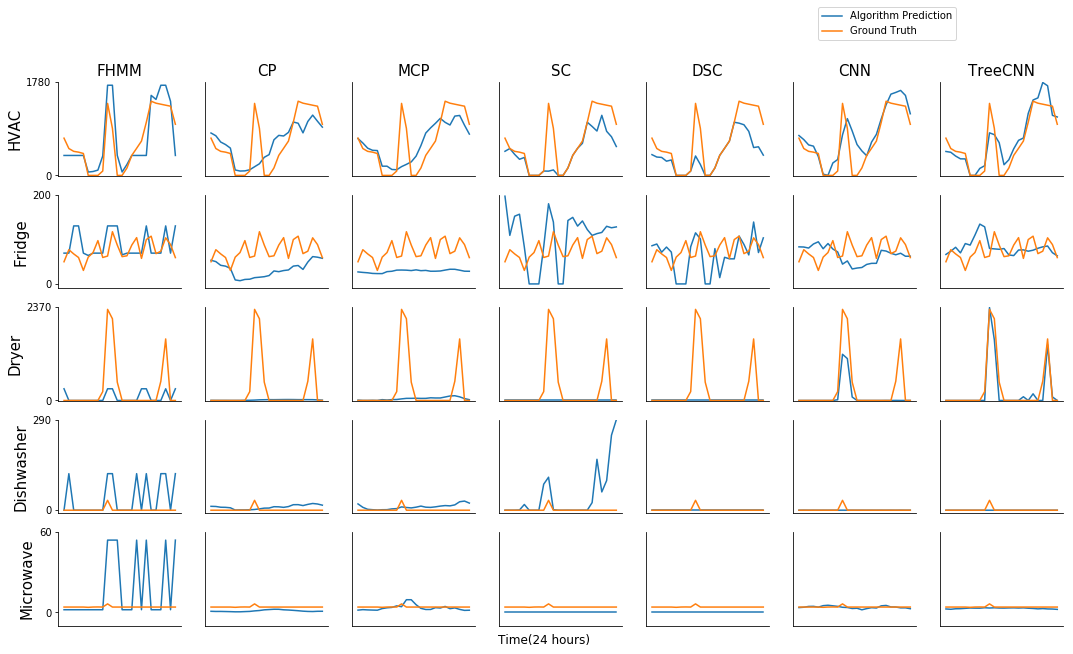

In [23]:


home = 27
day = 1
dataset = 1

i = 0 
home = 3
day = 110

fig, axes = plt.subplots(ncols=7, nrows=5, figsize=(18, 10))
ax = axes.flatten()
i=0
for idx, appliance in enumerate(APPLIANCE_ORDER[1:-1]):
    for method in ['fhmm', 'stf', 'mtf', 'sc', 'dsc', 'ind cnn', 'tree cnn']:

#             for method in ['tree cnn']:
#                 print(i, method)
#                 print(pd.DataFrame(max_pred).max()[appliance])
#                 if appliance == 'mw' and method == 'tree cnn':
#                     print(predictions[dataset][method][appliance][home][day])
#                 pred = np.minimum(predictions[dataset][method][appliance][home][day], tensor[dataset][home, 0:1, day])
        up = math.ceil(pd.DataFrame(max_pred).max()[appliance]/10.0)*10
        pd.Series(predictions[dataset][method][appliance][home][day]).plot(ax=ax[i], yticks=(0, up), ylim=(-10, up))
        pd.Series(tensor[dataset][home][idx+1][day]).plot(ax=ax[i], yticks=(0, up), ylim=(-10, up))
        ax[i].get_xaxis().set_visible(False)
        ax[i].get_yaxis().set_visible(False)
        ax[i].spines['right'].set_visible(False)
        ax[i].spines['top'].set_visible(False)


        i += 1
    ax[i-7].get_yaxis().set_visible(True)  
    ax[i-7].set_ylabel(APPLIANCE[idx], fontsize=15)
                       
ax[0].set_title("FHMM", fontsize=15)
ax[1].set_title("CP", fontsize=15)
ax[2].set_title("MCP", fontsize=15)
ax[3].set_title("SC", fontsize=15)
ax[4].set_title("DSC", fontsize=15)
ax[5].set_title("CNN", fontsize=15)
ax[6].set_title("TreeCNN", fontsize=15)




handles, labels = ax[0].get_legend_handles_labels()
print(handles)
# fig.legend(handles, labels=['Algorithm Prediction', 'Ground Truth'], loc=(0.7, 0.93))
plt.legend(['Algorithm Prediction', 'Ground Truth'], loc=(-1, 6.25))
fig.text(0.5,0.1, 'Time(24 hours)', ha='center', fontsize=12)


# plt.tight_layout(h_pad=2.0)
# fig.savefig("./figure/predictions/{}-{}.pdf".format(home, day), format='pdf')

# plt.cla()

In [83]:
return int(math.ceil(x / 10.0)) * 10

54.0

In [61]:
max_value = {}
for idx, appliance in enumerate(APPLIANCE_ORDER[1:-1]):
    print(pd.Series(max_pred[appliance]).max())
    max_pred[appliance] 

1773.9874267578125
196.59319169999847
2360.13623046875
289.5651437802001
54.0
